In [1]:
# Import necessary packages
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import sys
import itertools
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [2]:
# Function to load the images given the folder name
def load_folder(folder):
    imgs = []
    files = listdir('./MIO-TCD-Classification/train/{}/'.format(folder))
    img_counter = 0
    for img in files:
        # Read the images in grayscale
        img = cv2.cvtColor(cv2.imread('./MIO-TCD-Classification/train/{}/{}'.format(folder,img)), cv2.COLOR_BGR2GRAY)
        # Perform a box blur on the images
        kernel = np.array([[1/9,1/9,1/9], [1/9,1/9,1/9], [1/9,1/9,1/9]])
        img = cv2.filter2D(img, -1, kernel)
        # Resize to reduce computation time
        img = cv2.resize(img, (32,32))
        imgs.append(img)
        img_counter += 1
        if(img_counter==num_samples): break
    return imgs

In [3]:
# The number of images from each class to import
num_samples = 1000
# Import images from each folder
articulated_truck = load_folder('articulated_truck')
background = load_folder('background')
bicycle = load_folder('bicycle')
bus = load_folder('bus')
car = load_folder('car')
motorcycle = load_folder('motorcycle')
non_motorized_vehicle = load_folder('non-motorized_vehicle')
pedestrian = load_folder('pedestrian')
pickup_truck = load_folder('pickup_truck')
single_unit_truck = load_folder('single_unit_truck')
work_van = load_folder('work_van')

In [4]:
# Create the data and labels variables
X = articulated_truck + background + bicycle + bus + car + motorcycle + non_motorized_vehicle + pedestrian + pickup_truck + single_unit_truck + work_van
y = ['articulated_truck']*len(articulated_truck) + ['background']*len(background) + ['bicycle']*len(bicycle) + \
    ['bus']*len(bus) + ['car']*len(car) + ['motorcycle']*len(motorcycle) + ['non_motorized_vehicle']*len(non_motorized_vehicle)\
    + ['pedestrian']*len(pedestrian) + ['pickup_truck']*len(pickup_truck) + ['single_unit_truck']*len(single_unit_truck) + \
    ['work_van']*len(work_van)

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

In [5]:
# # Code adapted from official Keras repo: https://github.com/keras-team/keras/issues/4465
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input
# from keras.layers import Input, Flatten, Dense
# from keras.models import Model
# import numpy as np

# #Get back the convolutional part of a VGG network trained on ImageNet
# model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# model_vgg16_conv.summary()

# #Create your own input format (here 3x200x200)
# input = Input(shape=(64,64,3),name = 'image_input')

# #Use the generated model 
# output_vgg16_conv = model_vgg16_conv(input)

# #Add the fully-connected layers 
# x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(128, activation='relu', name='fc1')(x)
# #x = Dense(128, activation='relu', name='fc2')(x)
# x = Dense(11, activation='softmax', name='predictions')(x)

# #Create your own model 
# my_model = Model(input=input, output=x)

# #In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
# my_model.summary()


# #Then training with your data !

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

y = ['articulated_truck']*len(articulated_truck) + ['background']*len(background) + ['bicycle']*len(bicycle) + \
    ['bus']*len(bus) + ['car']*len(car) + ['motorcycle']*len(motorcycle) + ['non_motorized_vehicle']*len(non_motorized_vehicle)\
    + ['pedestrian']*len(pedestrian) + ['pickup_truck']*len(pickup_truck) + ['single_unit_truck']*len(single_unit_truck) + \
    ['work_van']*len(work_van)

enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_train = to_categorical(y_train)
y_test = enc.transform(y_test)
y_test = to_categorical(y_test)

for i in range(11):
    print('Encoding:',i, '- Label:', enc.inverse_transform(i))

C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Encoding: 0 - Label: articulated_truck
Encoding: 1 - Label: background
Encoding: 2 - Label: bicycle
Encoding: 3 - Label: bus
Encoding: 4 - Label: car
Encoding: 5 - Label: motorcycle
Encoding: 6 - Label: non_motorized_vehicle
Encoding: 7 - Label: pedestrian
Encoding: 8 - Label: pickup_truck
Encoding: 9 - Label: single_unit_truck
Encoding: 10 - Label: work_van


C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The tr

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import SGD

model = Sequential()
# input: 64x64 images with 1 channel -> (64, 64, 1) tensors.
# this applies 16 convolution filters of size 3x3 each.
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
#model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(11, activation='softmax'))
model.summary()

opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

X_train = np.array(X_train).reshape(-1,32,32,1)
X_test = np.array(X_test).reshape(-1,32,32,1)


print(X_train.shape)
history = model.fit(X_train, y_train, batch_size=1000, epochs=2, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, batch_size=1000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

Text(0.5,1,'Accuracy Curves')

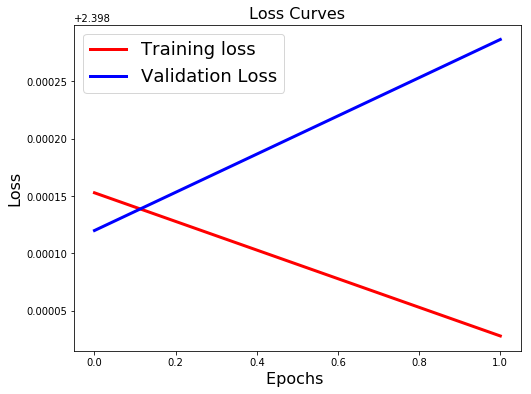

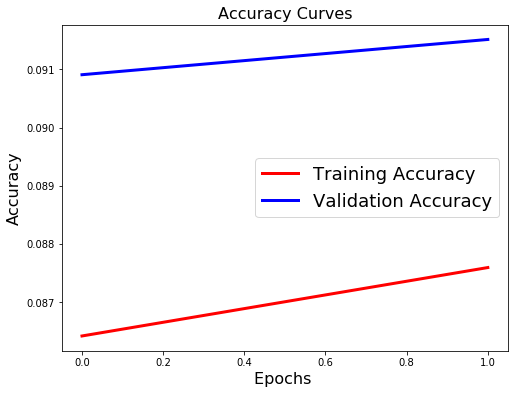

In [9]:
import matplotlib.pyplot as plt
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)